In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt


directory = '/Users/gregorycousins/Gonnorhea_proj/results/data/simulation_results'


files = os.listdir(directory)


csv_files = [file for file in files if file.endswith('.csv')]

# Sort the files by their creation time (newest first)
csv_files.sort(key=lambda x: os.path.getctime(os.path.join(directory, x)), reverse=True)

# Select the most recent file
latest_file = csv_files[0]

print(latest_file)

# Create the full path to the latest file
latest_file_path = os.path.join(directory, latest_file)

# Read the latest CSV file into a DataFrame
data_df = pd.read_csv(latest_file_path)

data_df = data_df.sort_values(by=["Tau"], ascending=True)

data_df


aggregated_results.csv


,Tau,Average Total Infections,Infections Std Dev,Infections Conf Interval Lower,Infections Conf Interval Upper,"Upper Confidence Bound, Total Infections",Average Total Detected Cases,Detected Cases Std Dev,Detected Cases Conf Interval Lower,Detected Cases Conf Interval Upper,"Upper Confidence Bound, Total Detected Cases",Average Percent Detected Cases,Percent Detected Cases Std Dev,Percent Detected Conf Interval Lower,Percent Detected Conf Interval Upper,"Upper Confidence Bound, Percent Detected Cases"
4,1,3280.852743,13654.357358,3013.232256,3548.473229,35054.469351,2461.922872,10665.346307,2252.885925,2670.959818,26373.522073,0.757138,0.150372,0.754191,0.760085,0.759612
13,2,3682.951383,15188.748202,3385.257388,3980.645377,39327.840582,2827.053850,12193.809267,2588.059580,3066.048120,30276.241642,0.765735,0.144552,0.762901,0.768568,0.768112
10,3,3982.654510,15594.577409,3677.006409,4288.302611,42391.624819,3057.527546,12456.719840,2813.380323,3301.674768,32624.223540,0.772130,0.149358,0.769203,0.775058,0.774587
8,4,4321.522574,16447.338595,3999.160661,4643.884487,45920.572194,3347.381395,13376.039618,3085.215836,3609.546954,35673.976679,0.773582,0.152841,0.770587,0.776578,0.776096
0,5,4611.178437,17160.978295,4274.829443,4947.527431,48934.514108,3585.277270,14126.703978,3308.398960,3862.155580,38176.408724,0.770691,0.141042,0.767926,0.773455,0.773011
1,6,4823.740499,17245.641327,4485.732140,5161.748858,51074.060561,3744.783664,14094.748473,3468.531670,4021.035658,39766.216456,0.771513,0.151061,0.768553,0.774474,0.773998
2,7,5466.574679,19121.613703,5091.797937,5841.351421,57810.972356,4252.665551,15707.983510,3944.794732,4560.536371,45110.388878,0.773114,0.153490,0.770105,0.776122,0.775639
9,8,5738.156330,19340.018259,5359.098937,6117.213722,60562.713218,4470.180618,15845.159543,4159.621198,4780.740039,47308.102997,0.769523,0.143547,0.766710,0.772337,0.771884
12,9,6089.249304,19800.351239,5701.169551,6477.329057,64149.360991,4737.482539,16230.879325,4419.363150,5055.601928,50044.567461,0.770518,0.145511,0.767666,0.773370,0.772912
7,10,6556.798612,20418.329548,6156.606707,6956.990518,68926.502463,5066.652918,16630.100472,4740.708938,5392.596898,53401.937285,0.766399,0.141959,0.763617,0.769181,0.768734


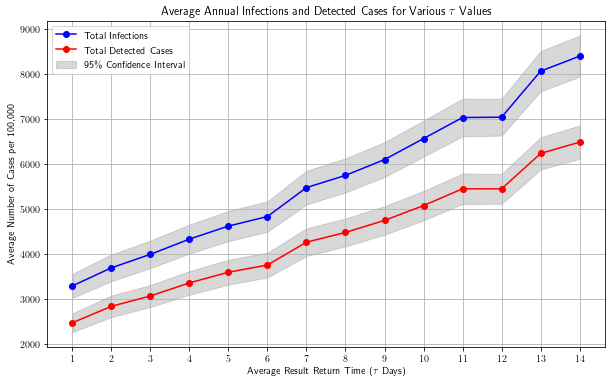

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Assuming data_df is your previously loaded DataFrame

# Enable LaTeX rendering in Matplotlib
plt.rc('text', usetex=True)

# Extract necessary columns
tau_values = data_df['Tau']
infections_mean = data_df['Average Total Infections']
detected_mean = data_df['Average Total Detected Cases']

# Calculate lower and upper bounds for infections and detected cases
infections_lower = data_df['Infections Conf Interval Lower']
infections_upper = data_df['Infections Conf Interval Upper']
detected_lower = data_df['Detected Cases Conf Interval Lower']
detected_upper = data_df['Detected Cases Conf Interval Upper']

# Plot settings
plt.figure(figsize=(10, 6))

# Plot total infections with grey error region
plt.plot(tau_values, infections_mean, color='blue', marker='o', label='Total Infections')
plt.fill_between(tau_values, infections_lower, infections_upper, color='gray', alpha=0.3, label='95\\% Confidence Interval')

# Plot total detected cases with grey error region
plt.plot(tau_values, detected_mean, color='red', marker='o', label='Total Detected Cases')
plt.fill_between(tau_values, detected_lower, detected_upper, color='gray', alpha=0.3)

# Customizing the plot
plt.xlabel(r'Average Result Return Time ($\tau$ Days)')
plt.ylabel(r'Average Number of Cases per 100,000')
plt.title(r'Average Annual Infections and Detected Cases for Various $\tau$ Values')
plt.legend()
plt.grid(True)

# Set x-axis ticks to show each integer value of Tau
plt.xticks(tau_values)

# Save the plot
file_path = '/Users/gregorycousins/Gonnorhea_proj/results/plots/infections_detected_comparison.png'
plt.savefig(file_path)

plt.show()
